In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Prevent "None" from being read as NA
df = pd.read_csv(
    "data/ames_housing_clean_1.csv",
    keep_default_na=False,  
    na_values=[]
)

## Descriptive Statistics

In [27]:
df.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MoSold,YrSold,SaleType,SaleCondition,AgeOfHouse,AgeOfGarage
0,905476230,1049,139500,120,RL,42.0,4235,Pave,Reg,Lvl,...,0,0,0,None,2,2009,WD,Normal,25,25.0
1,911128020,1001,124900,30,C (all),60.0,6060,Pave,Reg,Lvl,...,86,0,0,None,11,2007,WD,Normal,77,77.0
2,535377150,1039,114000,70,RL,80.0,8146,Pave,Reg,Lvl,...,0,111,0,None,5,2009,WD,Normal,109,69.0
3,534177230,1665,227000,60,RL,70.0,8400,Pave,Reg,Lvl,...,0,0,0,None,11,2009,WD,Normal,8,8.0
4,908128060,1922,198500,85,RL,64.0,7301,Pave,Reg,Lvl,...,0,0,0,None,7,2009,ConLD,Normal,6,6.0


In [28]:
df.shape

(1996, 79)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            1996 non-null   int64  
 1   GrLivArea      1996 non-null   int64  
 2   SalePrice      1996 non-null   int64  
 3   MSSubClass     1996 non-null   int64  
 4   MSZoning       1996 non-null   object 
 5   LotFrontage    1996 non-null   float64
 6   LotArea        1996 non-null   int64  
 7   Street         1996 non-null   object 
 8   LotShape       1996 non-null   object 
 9   LandContour    1996 non-null   object 
 10  Utilities      1996 non-null   object 
 11  LotConfig      1996 non-null   object 
 12  LandSlope      1996 non-null   object 
 13  Neighborhood   1996 non-null   object 
 14  Condition1     1996 non-null   object 
 15  Condition2     1996 non-null   object 
 16  BldgType       1996 non-null   object 
 17  HouseStyle     1996 non-null   object 
 18  OverallQ

In [32]:
# columns with missing values
df.isnull().any().any()

np.False_

In [33]:
df["MasVnrType"].value_counts()

MasVnrType
None       1220
BrkFace     597
Stone       166
BrkCmn       13
Name: count, dtype: int64

## Outcome Variable

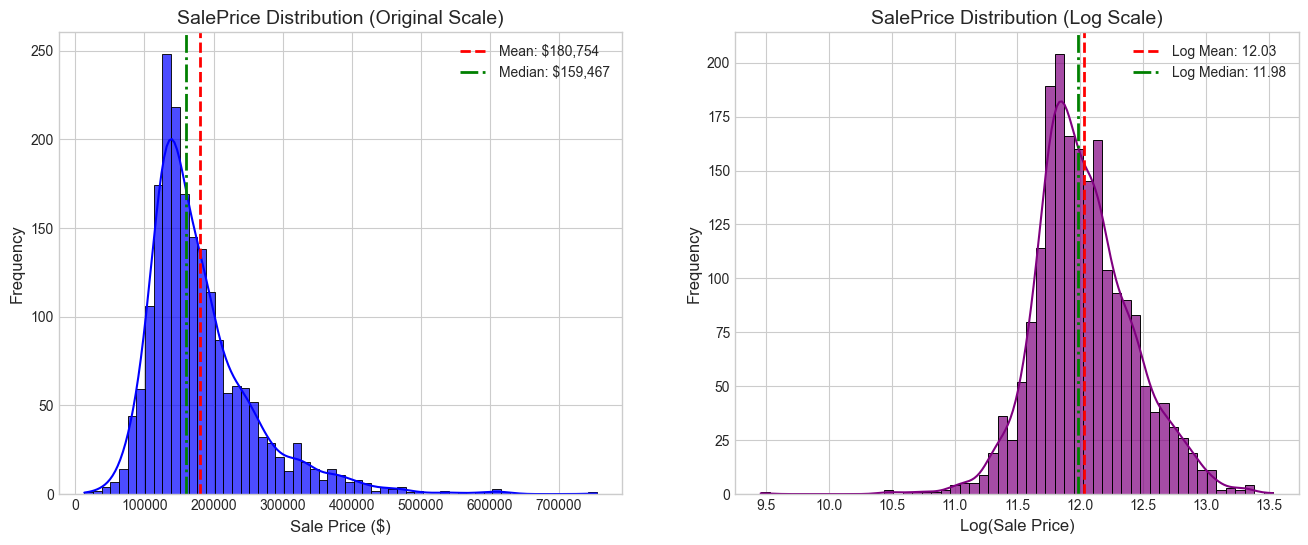

In [34]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Original Scale Distribution
sns.histplot(df['SalePrice'], kde=True, ax=ax1, color='blue', alpha=0.7)
ax1.set_title('SalePrice Distribution (Original Scale)', fontsize=14)
ax1.set_xlabel('Sale Price ($)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)

mean_price = df['SalePrice'].mean()
median_price = df['SalePrice'].median()
ax1.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_price:,.0f}')
ax1.axvline(median_price, color='green', linestyle='-.', linewidth=2, label=f'Median: ${median_price:,.0f}')
ax1.legend()

# Plot 2: Log Scale Distribution
log_price = np.log(df['SalePrice'])  # log(1+x) to avoid issues with zero values
sns.histplot(log_price, kde=True, ax=ax2, color='purple', alpha=0.7)
ax2.set_title('SalePrice Distribution (Log Scale)', fontsize=14)
ax2.set_xlabel('Log(Sale Price)', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)

log_mean = log_price.mean()
log_median = log_price.median()
ax2.axvline(log_mean, color='red', linestyle='--', linewidth=2, label=f'Log Mean: {log_mean:.2f}')
ax2.axvline(log_median, color='green', linestyle='-.', linewidth=2, label=f'Log Median: {log_median:.2f}')
ax2.legend()

In [35]:
numerical_cols = [
    'SalePrice', 'GrLivArea', 'LotArea', 'OverallQual', 'OverallCond', 
    'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
    'BsmtFinSF1', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 
    'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 
    'WoodDeckSF', 'OpenPorchSF'
]

# Select only numerical columns
df_num = df[numerical_cols]

# Calculate the correlation matrix
corr_matrix = df_num.corr()


In [36]:
len(numerical_cols)

20

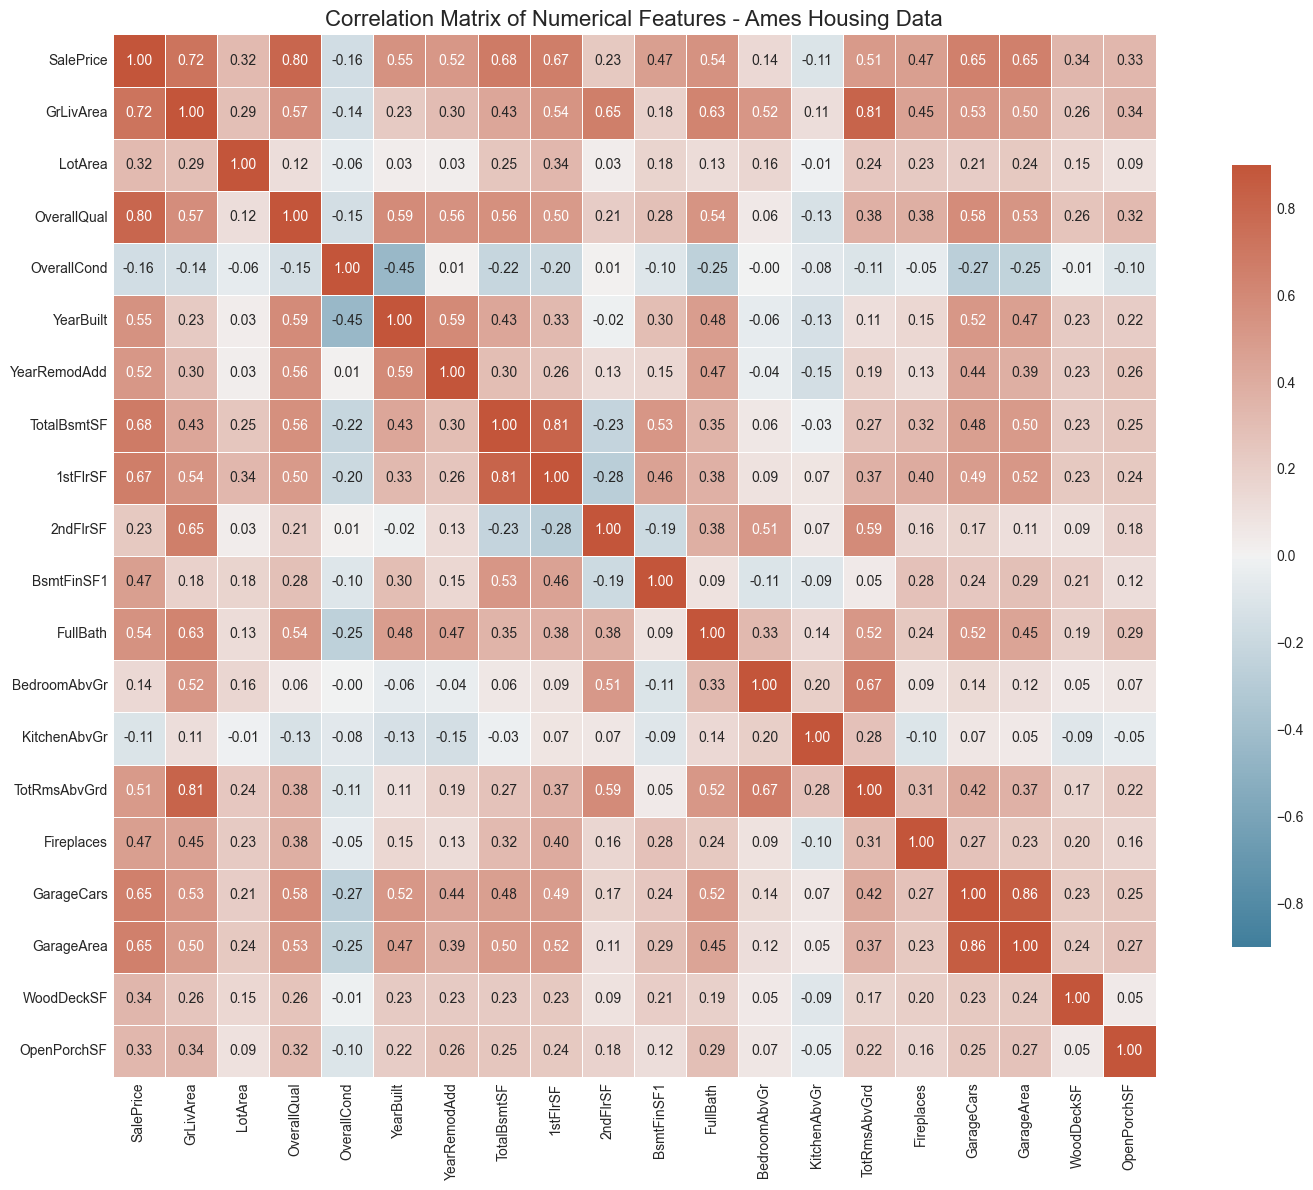

In [37]:
plt.figure(figsize=(16, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(
    corr_matrix, 
    # mask=mask,
    cmap=cmap,
    vmax=0.9,
    vmin=-0.9,
    center=0,
    square=True,
    linewidths=.5,
    annot=True,  # Show correlation values
    fmt='.2f',   # Display 2 decimal places
    cbar_kws={"shrink": .75}
)

plt.title('Correlation Matrix of Numerical Features - Ames Housing Data', fontsize=16)
plt.tight_layout()

Top correlations with SalePrice:
SalePrice       1.000000
OverallQual     0.796426
GrLivArea       0.722233
TotalBsmtSF     0.676588
1stFlrSF        0.666016
GarageCars      0.653547
GarageArea      0.647380
YearBuilt       0.547571
FullBath        0.543337
YearRemodAdd    0.518472
Name: SalePrice, dtype: float64


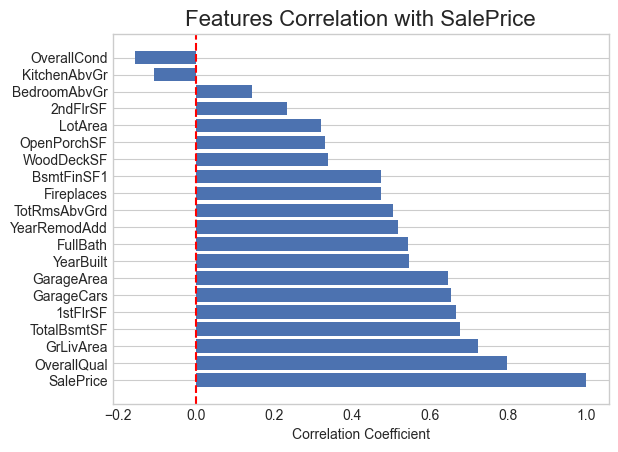

In [38]:
# Find correlations with SalePrice
corr_with_price = corr_matrix['SalePrice'].sort_values(ascending=False)

# Print the top correlations for reference
print("Top correlations with SalePrice:")
print(corr_with_price.head(10))

# Create a horizontal bar chart of correlations with SalePrice
plt.barh(np.arange(len(corr_with_price)), corr_with_price.values)
plt.yticks(np.arange(len(corr_with_price)), corr_with_price.index)
plt.xlabel('Correlation Coefficient')
plt.title('Features Correlation with SalePrice', fontsize=16)
plt.axvline(x=0, color='r', linestyle='--')
plt.grid(axis='x')
# plt.tight_layout()

In [ ]:
["Condition2", "RoofMatl", "Neighborhood", "GrLivArea", "PoolQC", "ExterQual",
"BsmtQual", "BsmtExposure", "KitchenQual", "SaleCondition", "Exterior1st"]